In [1]:
# Dependencies
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
import numpy as np
from scipy.stats import linregress, stats
from textwrap import wrap

## Ozone Data Collection/Clean-up

In [2]:
# Import excel sheets as data frames
xls = pd.ExcelFile('Resources/CA-daily_O3_ppb_2010-2016_Ruby.xlsx', )
ozone_2010 = pd.read_excel(xls, '2010', encoding='utf8')
ozone_2011 = pd.read_excel(xls, '2011', encoding='utf8')
ozone_2012 = pd.read_excel(xls, '2012', encoding='utf8')
ozone_2013 = pd.read_excel(xls, '2013', encoding='utf8')
ozone_2014 = pd.read_excel(xls, '2014', encoding='utf8')
ozone_2015 = pd.read_excel(xls, '2015', encoding='utf8')
ozone_2016 = pd.read_excel(xls, '2016', encoding='utf8')
ozone_2010.head(10)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,15,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
1,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,17,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
2,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,17,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
3,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,13,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
4,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,8,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
5,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,6,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
6,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,4,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
7,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,2,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
8,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,5,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473
9,6,1,7,44201,1,37.687526,-121.784217,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,8,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",42473


In [4]:
# display all columns
ozone_2010.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'O3_ppb', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [5]:
# use a for loop to remove extraneous columns from every df
sheets = [ozone_2010, ozone_2011, ozone_2012, ozone_2013, ozone_2014, ozone_2015, ozone_2016]
for df in sheets:
    df.drop(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'City Name',
       'CBSA Name', 'Date of Last Change'], axis=1, inplace=True)
ozone_2010.head()

,Date Local,O3_ppb,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,County Name
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda


In [6]:
# change the format of 'Data Local' to datetime object in every object and
# create a new column that contains only the year
for df in sheets:
    df['Date Local'] = pd.to_datetime(df['Date Local'], format='%Y-%m-%d')
    df['Year'] = pd.DatetimeIndex(df['Date Local']).year

In [7]:
ozone_2011.head()

,Date Local,O3_ppb,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,County Name,Year
0,2011-01-01,17.292,0.017292,0.028,23,24,Alameda,2011
1,2011-01-02,22.792,0.022792,0.030,0,25,Alameda,2011
2,2011-01-03,9.917,0.009917,0.019,9,16,Alameda,2011
3,2011-01-04,6.750,0.006750,0.019,10,16,Alameda,2011
4,2011-01-05,6.292,0.006292,0.019,11,16,Alameda,2011


In [8]:
# combine all individual dataframes into a single dataframe 
all_ozone = pd.concat(sheets, sort=False)
all_ozone

,Date Local,O3_ppb,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,County Name,Year,Unnamed: 16
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,NaN
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,NaN
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,NaN
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,NaN
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,NaN
5,2010-01-06,2.167,0.002167,0.007,10,6,Alameda,2010,NaN
6,2010-01-07,1.667,0.001667,0.005,8,4,Alameda,2010,NaN
7,2010-01-08,1.083,0.001083,0.002,5,2,Alameda,2010,NaN
8,2010-01-09,2.292,0.002292,0.006,8,5,Alameda,2010,NaN
9,2010-01-10,3.333,0.003333,0.009,10,8,Alameda,2010,NaN


In [9]:
# select only the relevant columns 
all_ozone_conc = all_ozone[['County Name', 'O3_ppb', 'AQI', 'Year']]

# rename the columns
all_ozone_conc = all_ozone_conc.rename(columns={'County Name': 'County', 'O3_ppb': 'Ozone (ppb)'})

# display the new df
all_ozone_conc.head()

,County,Ozone (ppb),AQI,Year
0,Alameda,7.632,15,2010
1,Alameda,11.958,17,2010
2,Alameda,14.458,17,2010
3,Alameda,7.958,13,2010
4,Alameda,3.667,8,2010


In [10]:
# create a new df by grouping the df by year and county and resetting the index
ozone_group = pd.DataFrame(all_ozone_conc.groupby(['Year', 'County']).mean()).reset_index()
ozone_group

,Year,County,Ozone (ppb),AQI
0,2010,Alameda,19.944734,25.596466
1,2010,Amador,25.307209,35.798898
2,2010,Butte,33.102122,37.502740
3,2010,Calaveras,29.328263,39.731507
4,2010,Colusa,25.605285,32.310541
5,2010,Contra Costa,23.958731,29.296025
6,2010,El Dorado,39.921773,44.703401
7,2010,Fresno,30.074166,48.199426
8,2010,Glenn,27.215805,34.192308
9,2010,Humboldt,22.857522,25.192308


## Asthma Data Collection/Cleaning

In [11]:
asthma_df = pd.read_csv('Resources/asthma-ed-visit-rates-lghc-indicator-07.csv')
asthma_df.head()

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,"117,854",40.0,7,28


In [12]:
# display all the unique counties in the df
asthma_df['Geography'].unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba', 'Humbolt'], dtype=object)

In [13]:
# remove 'California' so only specific counties remain
asthma_df = asthma_df.loc[asthma_df['Geography'] != 'California', :]

In [14]:
# ensure 'California' has been removed
asthma_df['Geography'].unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba', 'Humbolt'], dtype=object)

In [15]:
# check where null values exist
asthma_df.isnull().sum()

LGHC Indicator Name      0
Geography                0
Year                     0
Age Group                0
Strata                   0
Strata Name              0
Numerator              111
Rate                   637
LGHC Indicator ID        0
LGHC Target Rate         0
dtype: int64

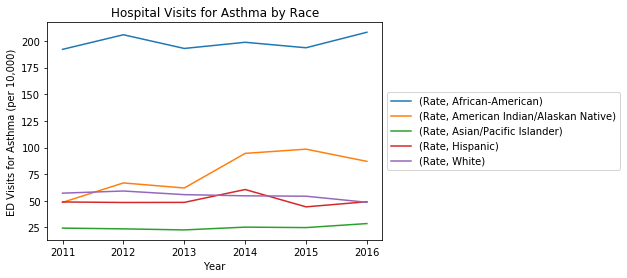

In [16]:
# create a df that only selects data for specific races
race_asthma = asthma_df.loc[(asthma_df['Strata Name'] == 'African-American') | (asthma_df['Strata Name'] == 'White') | (asthma_df['Strata Name'] == 'Hispanic') | (asthma_df['Strata Name'] == 'American Indian/Alaskan Native') | (asthma_df['Strata Name'] == 'Asian/Pacific Islander'), ['Geography', 'Strata Name','Year', 'Rate']]

# group df by race and year
race_asthma_df = pd.DataFrame(race_asthma.groupby(['Strata Name', 'Year']).mean())

# plot the grouped df
race_asthma_df.unstack(0).plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("ED Visits for Asthma (per 10,000)")
plt.title("Hospital Visits for Asthma by Race")
plt.savefig('Images/asthmabyrace.png')

In [17]:
asthma_nona = asthma_df.dropna()
asthma_nona.isnull().sum()

LGHC Indicator Name    0
Geography              0
Year                   0
Age Group              0
Strata                 0
Strata Name            0
Numerator              0
Rate                   0
LGHC Indicator ID      0
LGHC Target Rate       0
dtype: int64

In [18]:
aa_asthma = list(asthma_nona.loc[asthma_df['Strata Name'] == 'African-American',:]['Rate'])
ai_asthma = list(asthma_nona.loc[asthma_df['Strata Name'] == 'American Indian/Alaskan Native',:]['Rate'])
api_asthma = list(asthma_nona.loc[asthma_df['Strata Name'] == 'Asian/Pacific Islander',:]['Rate'])
his_asthma = list(asthma_nona.loc[asthma_df['Strata Name'] == 'Hispanic',:]['Rate'])
w_asthma = list(asthma_nona.loc[asthma_df['Strata Name'] == 'White',:]['Rate'])

In [19]:
print(f"ANOVA Result: {stats.f_oneway(aa_asthma, ai_asthma, api_asthma, his_asthma, w_asthma)}")
print(f"African-American vs American Indian: {stats.ttest_ind(aa_asthma,ai_asthma, equal_var=False)}")
print(f"African-American vs Asian/Pacific Islander: {stats.ttest_ind(aa_asthma,api_asthma, equal_var=False)}")
print(f"African-American vs Hispanic: {stats.ttest_ind(aa_asthma,his_asthma, equal_var=False)}")
print(f"African-American vs White: {stats.ttest_ind(aa_asthma,w_asthma, equal_var=False)}")

ANOVA Result: F_onewayResult(statistic=867.1659432495643, pvalue=0.0)
African-American vs American Indian: Ttest_indResult(statistic=15.099054528567263, pvalue=6.085250741097349e-40)
African-American vs Asian/Pacific Islander: Ttest_indResult(statistic=39.09610878197507, pvalue=2.7566420868826962e-173)
African-American vs Hispanic: Ttest_indResult(statistic=33.081264181843935, pvalue=3.103597249425379e-144)
African-American vs White: Ttest_indResult(statistic=32.01692427652215, pvalue=6.55057954128058e-138)


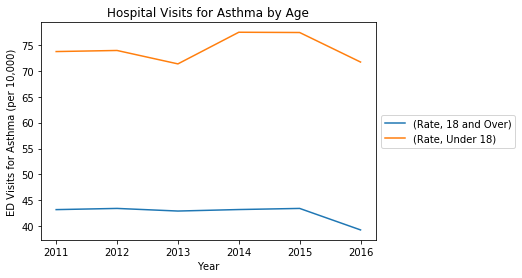

In [20]:
# create a df that only selects data for age groups
age_asthma = asthma_df.loc[(asthma_df['Strata Name'] == 'Under 18') | (asthma_df['Strata Name'] == '18 and Over'), 
                           ['Geography', 'Strata Name','Year', 'Rate']]

# group by age group and year
age_asthma_df = pd.DataFrame(age_asthma.groupby(['Strata Name', 'Year']).mean())

# plot the df
age_asthma_df.unstack(0).plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("ED Visits for Asthma (per 10,000)")
plt.title("Hospital Visits for Asthma by Age")
plt.savefig('Images/asthmabyage.png')

In [21]:
c_asthma = list(asthma_nona.loc[asthma_df['Strata Name'] == 'Under 18',:]['Rate'])
a_asthma = list(asthma_nona.loc[asthma_df['Strata Name'] == '18 and Over',:]['Rate'])

In [22]:
print(f"Adults vs Children: {stats.ttest_ind(a_asthma,c_asthma, equal_var = False)}")

Adults vs Children: Ttest_indResult(statistic=-18.765423393459084, pvalue=1.0727118983070974e-59)


In [23]:
# create a new df that has only data for children 
asthma_children_df = asthma_df.loc[(asthma_df['Strata'] == 'Total Population') & (asthma_df['Strata Name']=='Under 18'),:]

# rename 'Geography' column to 'County'
asthma_children_df = asthma_children_df.rename(columns={'Geography': 'County'})

# display df
asthma_children_df.head()

,LGHC Indicator Name,County,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
796,Asthma ED Visit Rates,Alameda,2015,Under 18,Total Population,Under 18,"3,426",96.7,7,28
797,Asthma ED Visit Rates,Amador,2015,Under 18,Total Population,Under 18,45,85.1,7,28
798,Asthma ED Visit Rates,Butte,2015,Under 18,Total Population,Under 18,308,68.7,7,28
799,Asthma ED Visit Rates,Calaveras,2015,Under 18,Total Population,Under 18,46,63.0,7,28
801,Asthma ED Visit Rates,Colusa,2015,Under 18,Total Population,Under 18,48,77.0,7,28


In [24]:
# create a new df that only has data for adults
asthma_adults_df = asthma_df.loc[(asthma_df['Strata'] == 'Total Population') & (asthma_df['Strata Name']=='18 and Over'),:]

# rename 'Geography' column to 'County'
asthma_adults_df = asthma_adults_df.rename(columns={'Geography': 'County'})

# display df
asthma_adults_df.head()

,LGHC Indicator Name,County,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
5,Asthma ED Visit Rates,Colusa,2015,18 and Over,Total Population,18 and Over,49,29.0,7,28


In [25]:
# select only relevant columns for children df
asthma_children_df = asthma_children_df[['Year', 'County', 'Rate']]
asthma_children_df.head()

,Year,County,Rate
796,2015,Alameda,96.7
797,2015,Amador,85.1
798,2015,Butte,68.7
799,2015,Calaveras,63.0
801,2015,Colusa,77.0


In [26]:
# select only relevant columns for adult df
asthma_adults_df = asthma_adults_df[['Year', 'County', 'Rate']]
asthma_adults_df.head()

,Year,County,Rate
0,2015,Alameda,53.1
1,2015,Amador,49.1
2,2015,Butte,43.8
3,2015,Calaveras,42.7
5,2015,Colusa,29.0


In [27]:
# create a new df by grouping children df by 'Year' and 'County'
asthma_children_group = pd.DataFrame(asthma_children_df.groupby(['Year', 'County']).mean()).reset_index()
asthma_children_group

,Year,County,Rate
0,2011,Alameda,75.9
1,2011,Amador,91.7
2,2011,Butte,63.8
3,2011,Calaveras,84.1
4,2011,Colusa,49.4
5,2011,Contra Costa,93.2
6,2011,Del Norte,90.0
7,2011,El Dorado,40.4
8,2011,Fresno,126.1
9,2011,Glenn,53.1


In [28]:
# create a new df by grouping adult df by 'Year' and 'County'
asthma_adults_group = pd.DataFrame(asthma_adults_df.groupby(['Year', 'County']).mean()).reset_index()
asthma_adults_group

,Year,County,Rate
0,2011,Alameda,56.6
1,2011,Amador,58.1
2,2011,Butte,49.9
3,2011,Calaveras,49.5
4,2011,Colusa,23.4
5,2011,Contra Costa,67.3
6,2011,Del Norte,46.7
7,2011,El Dorado,30.3
8,2011,Fresno,53.0
9,2011,Glenn,39.9


## Combining Ozone/AQI & Asthma Data

In [29]:
# merge children df with ozone data
oa_children_df = pd.merge(ozone_group, asthma_children_group, on=['Year','County'])
oa_children_df

,Year,County,Ozone (ppb),AQI,Rate
0,2011,Alameda,21.322507,26.141045,75.9
1,2011,Amador,25.426951,36.361644,91.7
2,2011,Butte,32.591449,37.293151,63.8
3,2011,Calaveras,29.013634,40.358127,84.1
4,2011,Colusa,25.211324,32.066482,49.4
5,2011,Contra Costa,22.785799,28.416667,93.2
6,2011,El Dorado,39.995495,47.191280,40.4
7,2011,Fresno,31.305375,49.700969,126.1
8,2011,Glenn,27.425226,34.767908,53.1
9,2011,Humboldt,22.321125,24.102996,65.0


In [30]:
# check for null values
oa_children_df.isnull().sum()

Year            0
County          0
Ozone (ppb)    49
AQI             0
Rate            2
dtype: int64

In [32]:
# drop counties where rate is null
oa_children_df = oa_children_df.dropna()

In [33]:
# merge adult df with ozone data
oa_adults_df = pd.merge(ozone_group, asthma_adults_group, on=['Year','County'])
oa_adults_df

,Year,County,Ozone (ppb),AQI,Rate
0,2011,Alameda,21.322507,26.141045,56.6
1,2011,Amador,25.426951,36.361644,58.1
2,2011,Butte,32.591449,37.293151,49.9
3,2011,Calaveras,29.013634,40.358127,49.5
4,2011,Colusa,25.211324,32.066482,23.4
5,2011,Contra Costa,22.785799,28.416667,67.3
6,2011,El Dorado,39.995495,47.191280,30.3
7,2011,Fresno,31.305375,49.700969,53.0
8,2011,Glenn,27.425226,34.767908,39.9
9,2011,Humboldt,22.321125,24.102996,67.2


In [34]:
# check for null values
oa_adults_df.isnull().sum()

Year            0
County          0
Ozone (ppb)    49
AQI             0
Rate            0
dtype: int64

In [37]:
# perform ANOVA to see if ozone concentration is significantly different from 2011 to 2016
ozone_2011 = list(oa_children_df.loc[oa_children_df['Year']==2011,:]['Ozone (ppb)'])
ozone_2012 = list(oa_children_df.loc[oa_children_df['Year']==2012,:]['Ozone (ppb)'])
ozone_2013 = list(oa_children_df.loc[oa_children_df['Year']==2013,:]['Ozone (ppb)'])
ozone_2014 = list(oa_children_df.loc[oa_children_df['Year']==2014,:]['Ozone (ppb)'])
ozone_2015 = list(oa_children_df.loc[oa_children_df['Year']==2015,:]['Ozone (ppb)'])
ozone_2016 = list(oa_children_df.loc[oa_children_df['Year']==2016,:]['Ozone (ppb)'])

In [38]:
stats.f_oneway(ozone_2011, ozone_2012, ozone_2013, ozone_2014, ozone_2015, ozone_2016)

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:2923: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


F_onewayResult(statistic=nan, pvalue=nan)

P-value is >0.05 which indicates there is no statistically significant difference in ozone ppb from 2011 to 2016

In [40]:
# # perform ANOVA to see if AQI is significantly different from 2011 to 2016
aqi_2011 = list(oa_children_df.loc[oa_children_df['Year']==2011,:]['AQI'])
aqi_2012 = list(oa_children_df.loc[oa_children_df['Year']==2012,:]['AQI'])
aqi_2013 = list(oa_children_df.loc[oa_children_df['Year']==2013,:]['AQI'])
aqi_2014 = list(oa_children_df.loc[oa_children_df['Year']==2014,:]['AQI'])
aqi_2015 = list(oa_children_df.loc[oa_children_df['Year']==2015,:]['AQI'])
aqi_2016 = list(oa_children_df.loc[oa_children_df['Year']==2016,:]['AQI'])
stats.f_oneway(aqi_2011, aqi_2012, aqi_2013, aqi_2014, aqi_2015, aqi_2016)

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:2923: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


F_onewayResult(statistic=nan, pvalue=nan)

P-value is >0.05 which indicates there is no statistically significant difference in ozone ppb from 2011 to 2016

In [41]:
counties = oa_children_df['County'].unique()
counties

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Los Angeles',
       'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Monterey',
       'Napa', 'Nevada', 'Orange', 'Placer', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano',
       'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo'], dtype=object)

ANOVA analysis comparing ozone concentration between two ounties in California 
Choose a county: Inyo
Choose another county: Shasta
F_onewayResult(statistic=75.11509291981118, pvalue=2.443118550243149e-05)


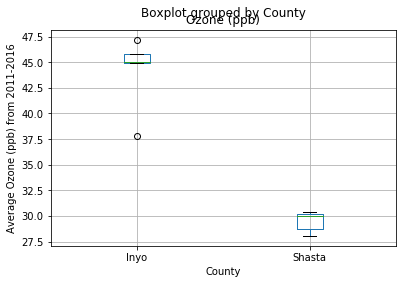

In [46]:
# ANOVA - Counties (Mean Ozone)
ozone_dict = {}
for county in counties:
    if county not in ozone_dict:
        ozone_dict[county] = list(oa_children_df.loc[oa_children_df['County']==county,:]['Ozone (ppb)'])
        
print("ANOVA analysis comparing ozone concentration between two ounties in California ")
try:
    ozone_compare1 = input("Choose a county: ")
    ozone_compare2 = input("Choose another county: ")
    print(stats.f_oneway(ozone_dict[ozone_compare1], ozone_dict[ozone_compare2]))
    comparison_df = pd.DataFrame(oa_children_df.loc[(oa_children_df['County']==ozone_compare1) | (oa_children_df['County']==ozone_compare2),:])
    comparison_df.boxplot('Ozone (ppb)', by='County')
    plt.ylabel("Average Ozone (ppb) from 2011-2016")
except KeyError: 
    print("Could not find county")
plt.savefig('Images/ozonecomparison.png')

In [49]:
# ANOVA - Counties (Mean AQI)
aqi_dict = {}
for county in counties:
    if county not in aqi_dict:
        aqi_dict[county] = list(oa_children_df.loc[oa_children_df['County']==county,:]['AQI'])
try:
    aqi_compare1 = input("Choose a county: ")
    aqi_compare2 = input("Choose another county: ")
    print(stats.f_oneway(aqi_dict[aqi_compare1], aqi_dict[aqi_compare2]))
except KeyError: 
    print("Could not find county")

Choose a county: Inyo
Choose another county: San Diego
F_onewayResult(statistic=13.793290726749994, pvalue=0.00592279064654395)


Choose a year: 2012
Choose a parameter (AQI or Ozone): Ozone
Choose a county: Inyo
Choose another county: Shasta
ANOVA analysis comparing Ozone between Inyo and Shasta in California in 2012
F_onewayResult(statistic=488.1114295409393, pvalue=5.618707639254213e-96)


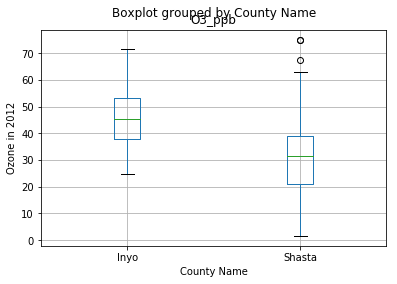

In [53]:
# ANOVA - Counties (Raw AQI + Raw Ozone) for chosen year

year = input("Choose a year: ")
ozone_yr = all_ozone.loc[all_ozone['Year']==int(year), :]
o3aqi_dict = {}
for county in counties:
    if county not in o3aqi_dict:
        o3aqi_dict[county] = {}
        o3aqi_dict[county]['Ozone'] = list(ozone_yr.loc[ozone_yr['County Name']==county,:]['O3_ppb'])
        o3aqi_dict[county]['AQI'] = list(ozone_yr.loc[ozone_yr['County Name']==county,:]['AQI'])
#print(o3aqi_dict)
        
try:
    parameter = input("Choose a parameter (AQI or Ozone): ")
    compare1 = input("Choose a county: ")
    compare2 = input("Choose another county: ")
    
    print(f"ANOVA analysis comparing {parameter} between {compare1} and {compare2} in California in {year}")

    print(stats.f_oneway(o3aqi_dict[compare1][parameter], o3aqi_dict[compare2][parameter]))
    comparison_df = pd.DataFrame(ozone_yr.loc[(ozone_yr['County Name']==compare1) | (ozone_yr['County Name']==compare2),:])
    if parameter == 'AQI':
        comparison_df.boxplot(parameter, by='County Name')
    if parameter == 'Ozone':
        comparison_df.boxplot('O3_ppb', by='County Name')
    plt.ylabel(f"{parameter} in {year}")
except KeyError: 
    print("Could not find county")
plt.savefig('Images/ozonecomparison2.png')

Text(0.5,0,'Asthma Rates')

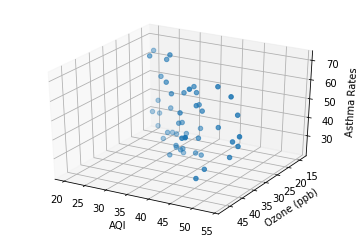

In [54]:



# 3D PLOT - AQI & Ozone vs Asthma Rates
# select only data for 2011
test_df = oa_adults_df.loc[oa_adults_df['Year']==2011, :]

# plot data (x-axis = AQI, y-axis = Ozone (ppb), x-axis = ED visit rate for asthma)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_df['AQI'], test_df['Ozone (ppb)'], test_df['Rate'])
plt.gca().invert_yaxis()

ax.set_xlabel('AQI')
ax.set_ylabel('Ozone (ppb)')
ax.set_zlabel('Asthma Rates')

## Asthma vs AQI Analysis

ValueError: Inputs must not be empty.

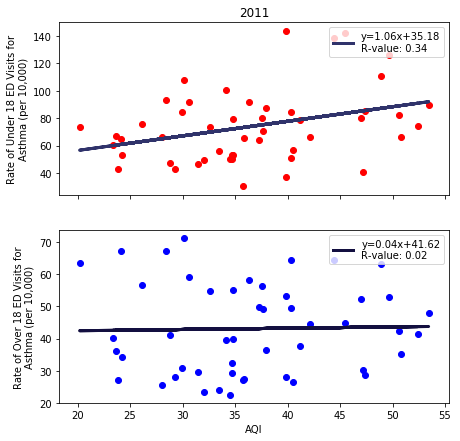

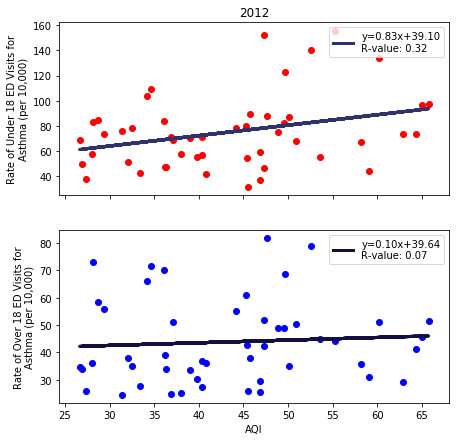

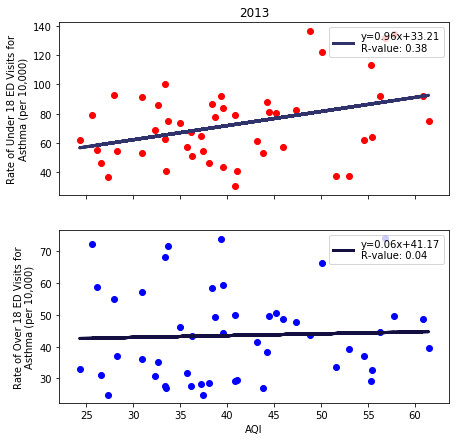

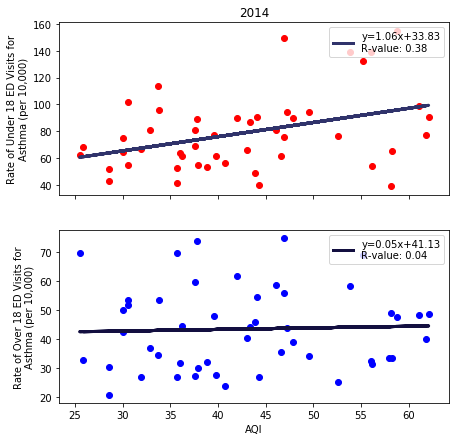

In [61]:
# Graph ADULTS ED rates vs AQI & CHILDREN ED rates vs AQI for each individual year
# Subplots: 1st graph contains data for children, 2nd graph contains data for adults
years = ['2011', '2012', '2013', '2014', '2015', '2016']

# create a subplot for each year
for year in years:
    # create copies of children/adult df by selecting only specific year in for loop
    child_df = oa_children_df.loc[oa_children_df['Year']==int(year), :]
    adult_df = oa_adults_df.loc[oa_adults_df['Year']==int(year), :]
    
    # linear regression for children
    (child_slope, child_intercept, child_r, _, _) = linregress(child_df['AQI'],child_df['Rate'])
    child_fit = child_slope * child_df['AQI'] + child_intercept
    
    # linear regression for adults
    (adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['AQI'],adult_df['Rate'])
    adult_fit = adult_slope * adult_df['AQI'] + adult_intercept
    
    # create 2 subplots that share x-axis
    f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
    # 1st plot (asthma in children vs AQI)
    axarr[0].plot(child_df['AQI'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
    axarr[0].legend(loc="upper right")
    axarr[0].scatter(child_df['AQI'], child_df['Rate'], c='red')
    axarr[0].set_title(f'{year}')
    axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
    # 2nd plot (asthma in adults vs AQI)
    axarr[1].plot(adult_df['AQI'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
    axarr[1].legend(loc="upper right")
    axarr[1].scatter(adult_df['AQI'], adult_df['Rate'], c='blue')
    axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
    axarr[1].set_xlabel('AQI') 
   #f.savefig(f'Images/aqivsasthma_{year}.png')
plt.savefig('Images/aqivsasthma_{year}.png')

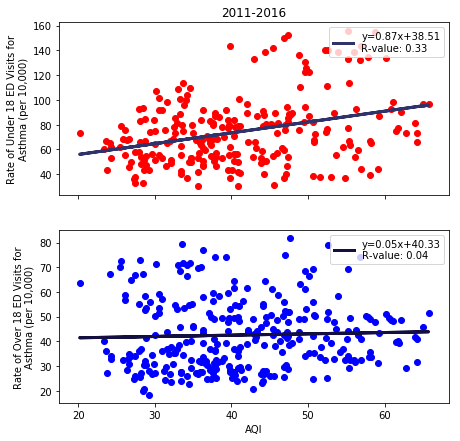

In [62]:
# Graph ADULTS ED rates vs AQI & CHILDREN ED rates vs AQI for all years
# Subplot: 1st graph contains data for children, 2nd graph contains data for adults

# create copies of merged adult/children dfs that contains data from all years
child_df = oa_children_df.loc[:]
adult_df = oa_adults_df.loc[:]
  
# linear regression for children data
(child_slope, child_intercept, child_r, _, _) = linregress(child_df['AQI'],child_df['Rate'])
child_fit = child_slope * child_df['AQI'] + child_intercept
  
# linear regression for adult data
(adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['AQI'],adult_df['Rate'])
adult_fit = adult_slope * adult_df['AQI'] + adult_intercept

# create 2 subplots that share x-axis
f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))

# 1st subplot (asthma in children vs AQI)
axarr[0].plot(child_df['AQI'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
axarr[0].legend(loc="upper right")
axarr[0].scatter(child_df['AQI'], child_df['Rate'], c='red')
axarr[0].set_title(f'2011-2016')
axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))

# 2nd subplot (asthma in adults vs AQI)
axarr[1].plot(adult_df['AQI'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
axarr[1].legend(loc="upper right")
axarr[1].scatter(adult_df['AQI'], adult_df['Rate'], c='blue')
axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
axarr[1].set_xlabel('AQI')
f.savefig(f'Images/aqivsasthma2011to2016.png')

## Asthma vs Ozone Analysis

ValueError: Inputs must not be empty.

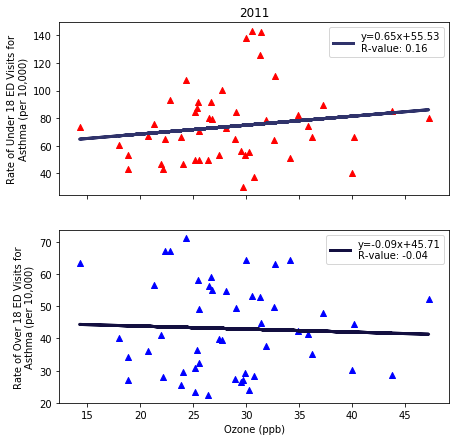

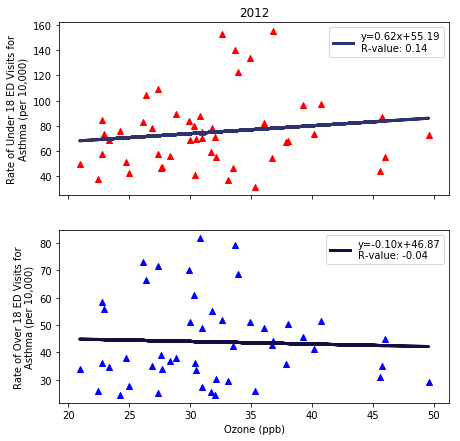

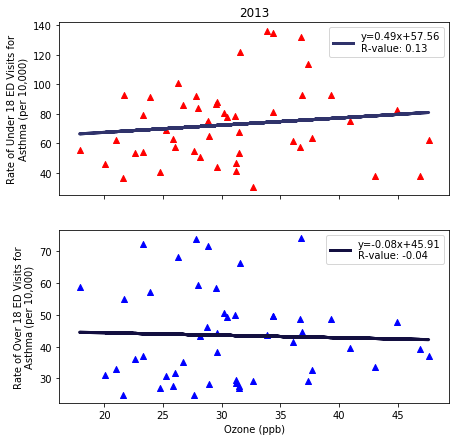

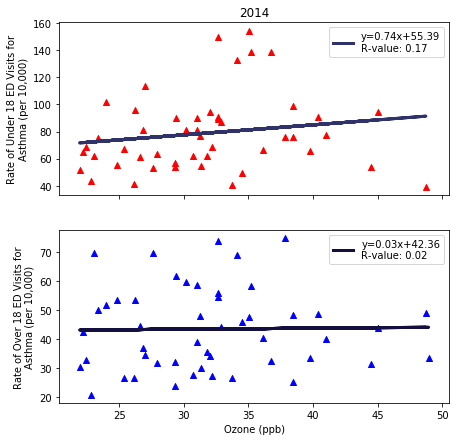

In [63]:
# Graph ADULTS ED rates vs Ozone & CHILDREN ED rates vs Ozone for each individual year
# Subplot: 1st graph contains data for children, 2nd graph contains data for adults

years = ['2011', '2012', '2013', '2014', '2015', '2016']

# create a subplot for each year
for year in years:
    # create copies of children/adult df by selecting data from specific year in for loop
    child_df = oa_children_df.loc[oa_children_df['Year']==int(year), :]
    adult_df = oa_adults_df.loc[oa_adults_df['Year']==int(year), :]
    
    # linear regression for children
    (child_slope, child_intercept, child_r, _, _) = linregress(child_df['Ozone (ppb)'],child_df['Rate'])
    child_fit = child_slope * child_df['Ozone (ppb)'] + child_intercept
    
    # linear regression for adults
    (adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['Ozone (ppb)'],adult_df['Rate'])
    adult_fit = adult_slope * adult_df['Ozone (ppb)'] + adult_intercept
    
    # create 2 subplots that share x-axis
    f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
    # 1st subplot (asthma in children vs ozone (ppb))
    axarr[0].plot(child_df['Ozone (ppb)'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
    axarr[0].legend(loc="upper right")
    axarr[0].scatter(child_df['Ozone (ppb)'], child_df['Rate'], c='red', marker="^")
    axarr[0].set_title(f'{year}')
    axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
    # 2nd subplot (asthma in adults vs ozone (ppb))
    axarr[1].plot(adult_df['Ozone (ppb)'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
    axarr[1].legend(loc="upper right")
    axarr[1].scatter(adult_df['Ozone (ppb)'], adult_df['Rate'], c='blue', marker="^")
    axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
    axarr[1].set_xlabel('Ozone (ppb)')    
    
    f.savefig(f'Images/ozonevsasthma_{year}.png')

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


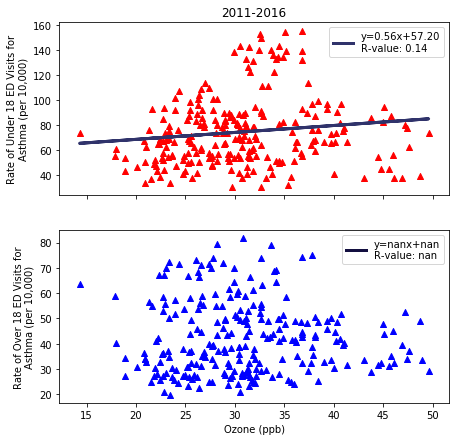

In [64]:
# Graph ADULTS ED rates vs Ozone & CHILDREN ED rates vs Ozone for all years
# Subplot: 1st graph contains data for children, 2nd graph contains data for adults

# create a copy of adult/children dfs that contains data for all years
child_df = oa_children_df.loc[:]
adult_df = oa_adults_df.loc[:]

# linear regression for children    
(child_slope, child_intercept, child_r, _, _) = linregress(child_df['Ozone (ppb)'],child_df['Rate'])
child_fit = child_slope * child_df['Ozone (ppb)'] + child_intercept
    
# linear regression for adults
(adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['Ozone (ppb)'],adult_df['Rate'])
adult_fit = adult_slope * adult_df['Ozone (ppb)'] + adult_intercept
    
# create 2 subplots that share x-axis
f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
# 1st subplot (asthma in children vs ozone (ppb))
axarr[0].plot(child_df['Ozone (ppb)'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
axarr[0].legend(loc="upper right")
axarr[0].scatter(child_df['Ozone (ppb)'], child_df['Rate'], c='red', marker="^")
axarr[0].set_title(f'2011-2016')
axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
# 2nd subplot (asthma in adults vs ozone (ppb))
axarr[1].plot(adult_df['Ozone (ppb)'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
axarr[1].legend(loc="upper right")
axarr[1].scatter(adult_df['Ozone (ppb)'], adult_df['Rate'], c='blue', marker="^")
axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
axarr[1].set_xlabel('Ozone (ppb)')

f.savefig(f'Images/aqivsozone2011to2016.png')

## PM2.5 Data Collection/Clean-up

In [65]:
pm25_df = pd.read_csv('Resources/CA_Counties_PM25_2011-2016.csv')
del pm25_df['Unnamed: 0']
pm25_df = pm25_df.rename(columns={"County Names": "County"})
pm25_df.head()

,County,2011 PM2.5,2012 PM2.5,2013 PM2.5,2014 PM2.5,2015 PM2.5,2016 PM2.5
0,Alameda,9.319157,8.049433,10.611844,8.550985,9.340246,7.695975
1,Butte,12.003279,7.797619,10.166667,8.807407,9.169578,7.600915
2,Calaveras,9.242926,7.001856,9.243005,7.922196,8.771994,8.101435
3,Colusa,5.830245,9.018392,7.435804,6.543522,6.837357,4.665881
4,Contra Costa,8.458423,7.061688,9.848264,8.597702,8.886865,7.098265


In [66]:
# ADULTS
# for each year, combine data from the ozone & asthma adults df for that specific year with the corresponding PM2.5 column and create a new df
# then rename the column name from "{year} PM2.5" in the new df simply to "PM2.5"
pm25_a_2011 = oa_adults_df.loc[oa_adults_df['Year']==2011,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2011 PM2.5']], on='County', how='inner')
pm25_a_2011 = pm25_a_2011.rename(columns={"2011 PM2.5": "PM2.5"})
pm25_a_2012 = oa_adults_df.loc[oa_adults_df['Year']==2012,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2012 PM2.5']], on='County', how='inner')
pm25_a_2012 = pm25_a_2012.rename(columns={"2012 PM2.5": "PM2.5"})
pm25_a_2013 = oa_adults_df.loc[oa_adults_df['Year']==2013,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2013 PM2.5']], on='County', how='inner')
pm25_a_2013 = pm25_a_2013.rename(columns={"2013 PM2.5": "PM2.5"})
pm25_a_2014 = oa_adults_df.loc[oa_adults_df['Year']==2014,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2014 PM2.5']], on='County', how='inner')
pm25_a_2014 = pm25_a_2014.rename(columns={"2014 PM2.5": "PM2.5"})
pm25_a_2015 = oa_adults_df.loc[oa_adults_df['Year']==2015,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2015 PM2.5']], on='County', how='inner')
pm25_a_2015 = pm25_a_2015.rename(columns={"2015 PM2.5": "PM2.5"})
pm25_a_2016 = oa_adults_df.loc[oa_adults_df['Year']==2016,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2016 PM2.5']], on='County', how='inner')
pm25_a_2016 = pm25_a_2016.rename(columns={"2016 PM2.5": "PM2.5"})

# CHILDREN
# for each year, combine data from the ozone & asthma children df for that specific year with the corresponding PM2.5 column and create a new df
# then rename the column name from "{year} PM2.5" in the new df simply to "PM2.5"
pm25_c_2011 = oa_children_df.loc[oa_children_df['Year']==2011,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2011 PM2.5']], on='County', how='inner')
pm25_c_2011 = pm25_c_2011.rename(columns={"2011 PM2.5": "PM2.5"})
pm25_c_2012 = oa_children_df.loc[oa_children_df['Year']==2012,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2012 PM2.5']], on='County', how='inner')
pm25_c_2012 = pm25_c_2012.rename(columns={"2012 PM2.5": "PM2.5"})
pm25_c_2013 = oa_children_df.loc[oa_children_df['Year']==2013,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2013 PM2.5']], on='County', how='inner')
pm25_c_2013 = pm25_c_2013.rename(columns={"2013 PM2.5": "PM2.5"})
pm25_c_2014 = oa_children_df.loc[oa_children_df['Year']==2014,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2014 PM2.5']], on='County', how='inner')
pm25_c_2014 = pm25_c_2014.rename(columns={"2014 PM2.5": "PM2.5"})
pm25_c_2015 = oa_children_df.loc[oa_children_df['Year']==2015,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2015 PM2.5']], on='County', how='inner')
pm25_c_2015 = pm25_c_2015.rename(columns={"2015 PM2.5": "PM2.5"})
pm25_c_2016 = oa_children_df.loc[oa_children_df['Year']==2016,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2016 PM2.5']], on='County', how='inner')
pm25_c_2016 = pm25_c_2016.rename(columns={"2016 PM2.5": "PM2.5"})

In [67]:
# display 1 of the newly created dataframes
pm25_a_2016

,Year,County,Rate,PM2.5
0,2016,Alameda,43.7,7.695975
1,2016,Butte,34.0,7.600915
2,2016,Calaveras,42.3,8.101435
3,2016,Colusa,25.0,4.665881
4,2016,Contra Costa,45.7,7.098265
5,2016,Fresno,41.1,11.279234
6,2016,Humboldt,66.8,5.962855
7,2016,Imperial,43.1,11.664553
8,2016,Inyo,38.8,5.352194
9,2016,Kern,43.3,8.040060


## Asthma vs PM2.5 Analysis

ValueError: Inputs must not be empty.

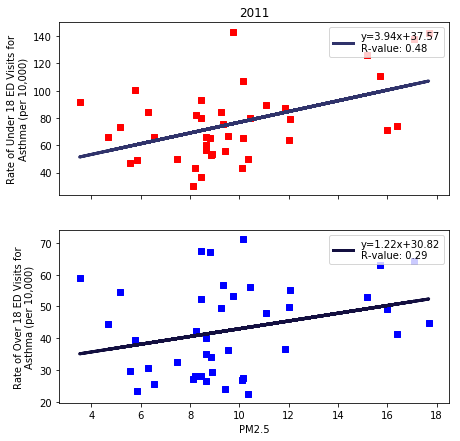

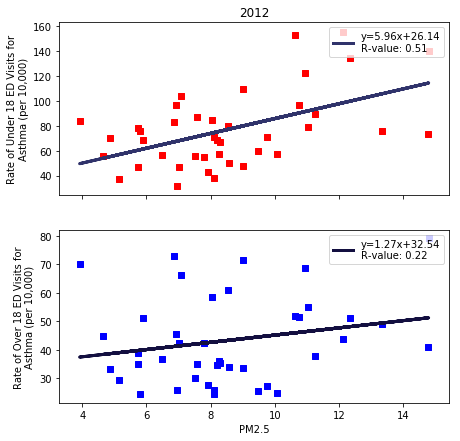

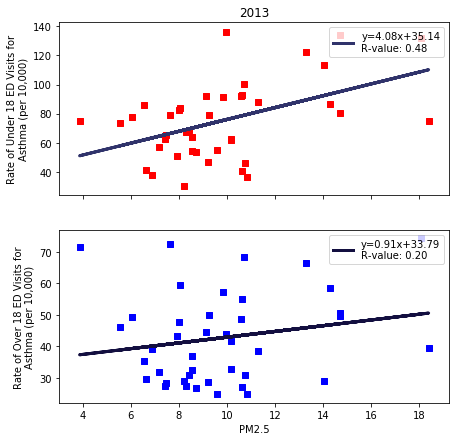

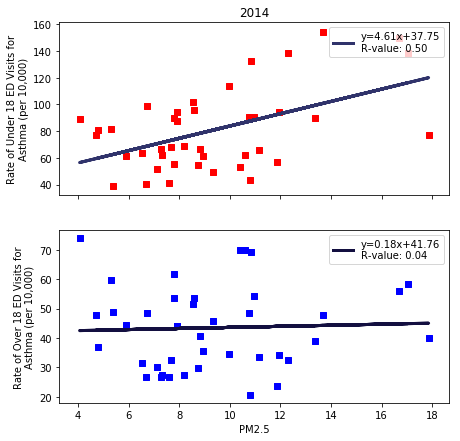

In [68]:
# Graph ADULTS ED rates vs PM2.5 & CHILDREN ED rates vs PM2.5 for each individual year
# Subplot: 1st graph contains data for children, 2nd graph contains data for adults
years = ['2011', '2012', '2013', '2014', '2015', '2016']

# dictionary that has corresponding children/adult df for each year
df_dict = {'2011': [pm25_c_2011, pm25_a_2011],
           '2012': [pm25_c_2012, pm25_a_2012],
           '2013': [pm25_c_2013, pm25_a_2013],
           '2014': [pm25_c_2014, pm25_a_2014],
           '2015': [pm25_c_2015, pm25_a_2015],
           '2016': [pm25_c_2016, pm25_a_2016],}

# create a subplot for each year
for year in years:
    # create temporary df that is a copy of the first element of the list corresponding to the current year in the for loop
    child_df = df_dict[year][0].loc[:]
    
    # create temporary df that is a copy of the second element of the list corresponding to the current year in the for loop
    adult_df = df_dict[year][1].loc[:]
    
    # linear regression for children
    (child_slope, child_intercept, child_r, _, _) = linregress(child_df['PM2.5'],child_df['Rate'])
    child_fit = child_slope * child_df['PM2.5'] + child_intercept
    
    # linear regression for adults 
    (adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['PM2.5'],adult_df['Rate'])
    adult_fit = adult_slope * adult_df['PM2.5'] + adult_intercept
    
    # create 2 subplots that share x-axis
    f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
    # 1st plot (asthma in children vs PM2.5)
    axarr[0].plot(child_df['PM2.5'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
    axarr[0].legend(loc="upper right")
    axarr[0].scatter(child_df['PM2.5'], child_df['Rate'], c='red', marker='s')
    axarr[0].set_title(f'{year}')
    axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
    # 2nd plot (asthma in adults vs PM2.5)
    axarr[1].plot(adult_df['PM2.5'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
    axarr[1].legend(loc="upper right")
    axarr[1].scatter(adult_df['PM2.5'], adult_df['Rate'], c='blue', marker='s')
    axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
    axarr[1].set_xlabel('PM2.5')    
    f.savefig(f'Images/pm25vsasthma_{year}.png')

In [69]:
# create list of all pm2.5 dfs with adult data
adults_pm25 = [pm25_a_2011, pm25_a_2012, pm25_a_2013, pm25_a_2014, pm25_a_2015, pm25_a_2016]

# create list of all pm2.5 dfs with children data
child_pm25 = [pm25_c_2011, pm25_c_2012, pm25_c_2013, pm25_c_2014, pm25_c_2015, pm25_c_2016]

# concatenate each individual PM2.5 df w/ adult data into one 
all_pm25_a = pd.concat(adults_pm25, sort=False)

# concatenate each individual PM2.5 df w/ children data into one 
all_pm25_c = pd.concat(child_pm25, sort=False)

# display combined adult pm2.5 df
all_pm25_a

,Year,County,Rate,PM2.5
0,2011,Alameda,56.6,9.319157
1,2011,Butte,49.9,12.003279
2,2011,Calaveras,49.5,9.242926
3,2011,Colusa,23.4,5.830245
4,2011,Contra Costa,67.3,8.458423
5,2011,Fresno,53.0,15.162573
6,2011,Humboldt,67.2,8.803835
7,2011,Imperial,53.2,9.759794
8,2011,Inyo,52.4,8.444740
9,2011,Kern,42.2,8.260165


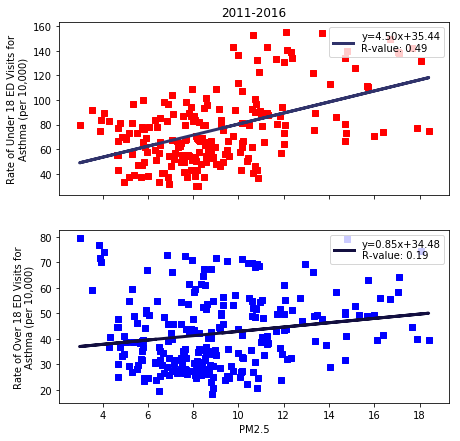

In [70]:
# Graph ADULTS ED rates vs PM2.5 & CHILDREN ED rates vs PM2.5 for all years
# Subplot: 1st graph contains data for children, 2nd graph contains data for adults

# create a temporary df that is a copy of children pm2.5 df
child_df = all_pm25_c.loc[:]

# create a temporary df that is a copy of adult pm2.5 df
adult_df = all_pm25_a.loc[:]
    
# linear regression for children
(child_slope, child_intercept, child_r, _, _) = linregress(child_df['PM2.5'],child_df['Rate'])
child_fit = child_slope * child_df['PM2.5'] + child_intercept

# linear regression for adults
(adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['PM2.5'],adult_df['Rate'])
adult_fit = adult_slope * adult_df['PM2.5'] + adult_intercept
    
# create 2 subplots that share x-axis
f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
 
# 1st subplot (asthma in children vs pm2.5)
axarr[0].plot(child_df['PM2.5'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
axarr[0].legend(loc="upper right")
axarr[0].scatter(child_df['PM2.5'], child_df['Rate'], c='red', marker='s')
axarr[0].set_title(f'2011-2016')
axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
# 2nd subplot (asthma in adults vs pm2.5)
axarr[1].plot(adult_df['PM2.5'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
axarr[1].legend(loc="upper right")
axarr[1].scatter(adult_df['PM2.5'], adult_df['Rate'], c='blue', marker='s')
axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
axarr[1].set_xlabel('PM2.5')
f.savefig(f'Images/aqivspm252011to2016.png')

## Temperature Analysis

In [71]:
xls = pd.ExcelFile('Resources/CA-daily_Temp_2010-2016_Ruby.xlsx', )
temp_2010 = pd.read_excel(xls, '2010', encoding='utf8')
temp_2011 = pd.read_excel(xls, '2011', encoding='utf8')
temp_2012 = pd.read_excel(xls, '2012', encoding='utf8')
temp_2013 = pd.read_excel(xls, '2013', encoding='utf8')
temp_2014 = pd.read_excel(xls, '2014', encoding='utf8')
temp_2015 = pd.read_excel(xls, '2015', encoding='utf8')
temp_2016 = pd.read_excel(xls, '2016', encoding='utf8')
temp_2010.head(10)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
1,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
2,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
3,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
4,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
5,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
6,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
7,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
8,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
9,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435


In [72]:
temp_2010.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       'Temp Celsius', '1st Max Value', '1st Max Hour', 'AQI', 'Method Code',
       'Method Name', 'Local Site Name', 'Address', 'State Name',
       'County Name', 'City Name', 'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [73]:
# remove extraneous columns from every df
sheets = [temp_2010, temp_2011,temp_2012, temp_2013, temp_2014, temp_2015, temp_2016]
for df in sheets:
    df.drop(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'City Name',
       'CBSA Name', 'Date of Last Change'], axis=1, inplace=True)
temp_2010.head()

,Date Local,Arithmetic Mean,Temp Celsius,1st Max Value,1st Max Hour,AQI,County Name
0,2010-01-01,49.250000,9.583333,55.0,11,NaN,Amador
1,2010-01-02,48.083333,8.935185,57.0,12,NaN,Amador
2,2010-01-03,43.916667,6.620371,55.0,12,NaN,Amador
3,2010-01-04,45.166667,7.314815,57.0,15,NaN,Amador
4,2010-01-05,40.166667,4.537037,50.0,11,NaN,Amador


In [74]:
for df in sheets:
    df['Date Local'] = pd.to_datetime(df['Date Local'], format='%Y-%m-%d')
    df['Year'] = pd.DatetimeIndex(df['Date Local']).year

In [75]:
temp_2015.head()

,Date Local,Arithmetic Mean,Temp Celsius,1st Max Value,1st Max Hour,AQI,County Name,Year
0,2015-08-01,75.433333,24.129629,88.9,16,NaN,Amador,2015
1,2015-08-02,73.833333,23.240741,89.8,15,NaN,Amador,2015
2,2015-08-03,70.137500,21.187500,86.5,15,NaN,Amador,2015
3,2015-08-04,65.766667,18.759259,79.0,15,NaN,Amador,2015
4,2015-08-05,69.937500,21.076389,87.4,16,NaN,Amador,2015


In [76]:
all_temp = pd.concat(sheets, sort=False)
all_temp.head()

,Date Local,Arithmetic Mean,Temp Celsius,1st Max Value,1st Max Hour,AQI,County Name,Year
0,2010-01-01,49.250000,9.583333,55.0,11,NaN,Amador,2010
1,2010-01-02,48.083333,8.935185,57.0,12,NaN,Amador,2010
2,2010-01-03,43.916667,6.620371,55.0,12,NaN,Amador,2010
3,2010-01-04,45.166667,7.314815,57.0,15,NaN,Amador,2010
4,2010-01-05,40.166667,4.537037,50.0,11,NaN,Amador,2010


In [77]:
all_temp.isnull().sum()

Date Local              0
Arithmetic Mean         0
Temp Celsius            0
1st Max Value           0
1st Max Hour            0
AQI                364657
County Name             0
Year                    0
dtype: int64

In [78]:
all_temp = all_temp[['County Name', 'Arithmetic Mean', 'Temp Celsius', 'Year']]
all_temp = all_temp.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'Temp (F)', 'Temp Celsius': 'Temp (C)'})
all_temp.head()

,County,Temp (F),Temp (C),Year
0,Amador,49.250000,9.583333,2010
1,Amador,48.083333,8.935185,2010
2,Amador,43.916667,6.620371,2010
3,Amador,45.166667,7.314815,2010
4,Amador,40.166667,4.537037,2010


In [79]:
# Taking mean of all temperatures for plot with error bar
mean_temp_group = pd.DataFrame(all_temp.groupby(['Year', 'County']).mean()).reset_index()
mean_temp_group = mean_temp_group[['Year', 'County', 'Temp (C)']]
mean_temp_group = mean_temp_group.rename(columns={'Temp (C)': 'Mean Temp (C)'})
mean_temp_group.head()

,Year,County,Mean Temp (C)
0,2010,Amador,13.613824
1,2010,Butte,15.786831
2,2010,Calaveras,14.539423
3,2010,Colusa,16.030518
4,2010,Del Norte,11.256211


In [80]:
# Taking SEM for plot
sem_temp_group = pd.DataFrame(all_temp.groupby(['Year', 'County']).sem()).reset_index()
sem_temp_group = sem_temp_group[['Year', 'County', 'Temp (C)']]
sem_temp_group = sem_temp_group.rename(columns={'Temp (C)': 'Temp (C) SEM'})
sem_temp_group.head()

,Year,County,Temp (C) SEM
0,2010,Amador,0.330683
1,2010,Butte,0.191291
2,2010,Calaveras,0.326720
3,2010,Colusa,0.330123
4,2010,Del Norte,0.173539


In [81]:
# To measure Max values
max_temp_group = pd.DataFrame(all_temp.groupby(['Year', 'County']).max()).reset_index()
max_temp_group = max_temp_group[['Year', 'County', 'Temp (C)']]
max_temp_group = max_temp_group.rename(columns={'Temp (C)': 'Max Temp (C)'})
max_temp_group.head()

,Year,County,Max Temp (C)
0,2010,Amador,28.657407
1,2010,Butte,35.023148
2,2010,Calaveras,30.046296
3,2010,Colusa,30.416667
4,2010,Del Norte,19.375000


In [82]:
meanmax_temp = pd.merge(mean_temp_group, max_temp_group, on=['Year', 'County'])
meanmaxsem_temp = pd.merge(meanmax_temp, sem_temp_group, on=['Year', 'County'])
meanmaxsem_temp

,Year,County,Mean Temp (C),Max Temp (C),Temp (C) SEM
0,2010,Amador,13.613824,28.657407,0.330683
1,2010,Butte,15.786831,35.023148,0.191291
2,2010,Calaveras,14.539423,30.046296,0.326720
3,2010,Colusa,16.030518,30.416667,0.330123
4,2010,Del Norte,11.256211,19.375000,0.173539
5,2010,El Dorado,12.458597,32.986111,0.250222
6,2010,Fresno,17.056867,33.032407,0.170973
7,2010,Glenn,16.175942,30.277778,0.342094
8,2010,Humboldt,12.535193,24.791667,0.314701
9,2010,Imperial,23.523352,41.111111,0.177085


In [86]:
all_mean_temp_group = all_mean_temp_group.unstack(1).reset_index()
all_mean_temp_group = all_mean_temp_group.loc[:,['Year', 'County', 0]]
all_mean_temp_group.columns = ['Year', 'County', 'Temp (C)']
all_mean_temp_group

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Year,County,Temp (C)
0,NaN,NaN,2010
1,NaN,NaN,2010
2,NaN,NaN,2010
3,NaN,NaN,2010
4,NaN,NaN,2010
5,NaN,NaN,2010
6,NaN,NaN,2010
7,NaN,NaN,2010
8,NaN,NaN,2010
9,NaN,NaN,2010


In [71]:
ozone_group_2010 = ozone_group.loc[ozone_group['Year']==2010,:]
ozone_group_2011 = ozone_group.loc[ozone_group['Year']==2011,:]
ozone_group_2012 = ozone_group.loc[ozone_group['Year']==2012,:]
ozone_group_2013 = ozone_group.loc[ozone_group['Year']==2013,:]
ozone_group_2014 = ozone_group.loc[ozone_group['Year']==2014,:]
ozone_group_2015 = ozone_group.loc[ozone_group['Year']==2015,:]
ozone_group_2016 = ozone_group.loc[ozone_group['Year']==2016,:]
ozone_group_2010.head()

,Year,County,Ozone (ppb),AQI
0,2010,Alameda,19.944734,25.596466
1,2010,Amador,25.307209,35.798898
2,2010,Butte,33.102122,37.502740
3,2010,Calaveras,29.328263,39.731507
4,2010,Colusa,25.605285,32.310541


In [72]:
max_ppb = ozone_group_2011['Ozone (ppb)'].max()
max_county_2011 = ozone_group_2011.loc[ozone_group_2011['Ozone (ppb)'] == max_ppb,:] 
max_county_2011

,Year,County,Ozone (ppb),AQI
60,2011,Inyo,47.201216,46.980609


In [73]:
min_ppb = ozone_group_2011['Ozone (ppb)'].min()
min_county_2011 = ozone_group_2011.loc[ozone_group_2011['Ozone (ppb)'] == min_ppb,:] 
min_county_2011

,Year,County,Ozone (ppb),AQI
68,2011,Mendocino,14.289593,20.184066


In [74]:
all_pm25_a.head()

,Year,County,Rate,PM2.5
0,2011,Alameda,56.6,9.319157
1,2011,Butte,49.9,12.003279
2,2011,Calaveras,49.5,9.242926
3,2011,Colusa,23.4,5.830245
4,2011,Contra Costa,67.3,8.458423


In [75]:
all_pm25 = all_pm25_a[['Year', 'County', 'PM2.5']]
all_pm25

,Year,County,PM2.5
0,2011,Alameda,9.319157
1,2011,Butte,12.003279
2,2011,Calaveras,9.242926
3,2011,Colusa,5.830245
4,2011,Contra Costa,8.458423
5,2011,Fresno,15.162573
6,2011,Humboldt,8.803835
7,2011,Imperial,9.759794
8,2011,Inyo,8.444740
9,2011,Kern,8.260165


In [76]:
meanmaxsem_temp.count()

Year             262
County           262
Mean Temp (C)    262
Max Temp (C)     262
Temp (C) SEM     262
dtype: int64

In [77]:
ozone_temp_df = pd.merge(meanmaxsem_temp, ozone_group, on=['Year', 'County'])
ozone_temp_df.head()

,Year,County,Mean Temp (C),Max Temp (C),Temp (C) SEM,Ozone (ppb),AQI
0,2010,Amador,13.613824,28.657407,0.330683,25.307209,35.798898
1,2010,Butte,15.786831,35.023148,0.191291,33.102122,37.502740
2,2010,Calaveras,14.539423,30.046296,0.326720,29.328263,39.731507
3,2010,Colusa,16.030518,30.416667,0.330123,25.605285,32.310541
4,2010,El Dorado,12.458597,32.986111,0.250222,39.921773,44.703401


In [78]:
ozone_temp_df.count()

Year             250
County           250
Mean Temp (C)    250
Max Temp (C)     250
Temp (C) SEM     250
Ozone (ppb)      217
AQI              250
dtype: int64

In [79]:
ozone_temp_pm25_df = pd.merge(ozone_temp_df, all_pm25, on=['Year', 'County'])
ozone_temp_pm25_df.head()

,Year,County,Mean Temp (C),Max Temp (C),Temp (C) SEM,Ozone (ppb),AQI,PM2.5
0,2011,Butte,15.256110,32.731482,0.190859,32.591449,37.293151,12.003279
1,2011,Calaveras,14.037498,28.449074,0.380302,29.013634,40.358127,9.242926
2,2011,Colusa,15.569444,29.699074,0.361741,25.211324,32.066482,5.830245
3,2011,Fresno,16.782414,32.222222,0.179009,31.305375,49.700969,15.162573
4,2011,Humboldt,10.977861,27.777778,0.305376,22.321125,24.102996,8.803835


In [80]:
ozone_temp_pm25_df.count()

Year             185
County           185
Mean Temp (C)    185
Max Temp (C)     185
Temp (C) SEM     185
Ozone (ppb)      155
AQI              185
PM2.5            185
dtype: int64

In [81]:
min_temp = ozone_temp_pm25_df['Max Temp (C)'].min()
min_county = ozone_temp_pm25_df.loc[ozone_temp_pm25_df['Max Temp (C)']==min_temp]['County']
min_county

28    Shasta
Name: County, dtype: object

In [85]:
max_temp = ozone_temp_pm25_df['Max Temp (C)'].max()
max_county = ozone_temp_pm25_df.loc[ozone_temp_pm25_df['Max Temp (C)']==max_temp]['County']
max_county

73    Inyo
Name: County, dtype: object

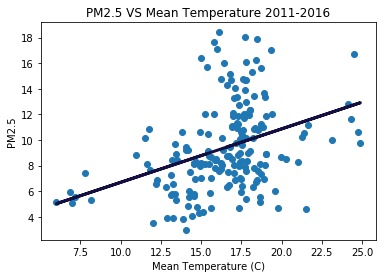

In [87]:
plt.scatter(ozone_temp_pm25_df['Mean Temp (C)'], ozone_temp_pm25_df['PM2.5'])
plt.xlabel("Mean Temperature (C)")
plt.ylabel("PM2.5")
plt.title("PM2.5 VS Mean Temperature 2011-2016")
(slope, intercept, r, _, _) = linregress(ozone_temp_pm25_df['Mean Temp (C)'], ozone_temp_pm25_df['PM2.5'])
fit = slope * ozone_temp_pm25_df['Mean Temp (C)'] + intercept
plt.plot(ozone_temp_pm25_df['Mean Temp (C)'], fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(slope, intercept, r))
plt.savefig('Images/pm25vstemp.png')

In [3]:
plt.scatter(ozone_temp_pm25_df['PM2.5'], ozone_temp_pm25_df['Ozone (ppb)'])
plt.xlabel("PM2.5")
plt.ylabel("Ozone (ppb)")
plt.title("Ozone (ppb) vs PM2.5 2011-2016")
(slope, intercept, r, _, _) = linregress(ozone_temp_pm25_df['PM2.5'], ozone_temp_pm25_df['Ozone (ppb)'])
fit = slope * ozone_temp_pm25_df['PM2.5'] + intercept
plt.plot(ozone_temp_pm25_df['PM2.5'], fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(slope, intercept, r))
plt.savefig('Images/ozonevspm25.png')

NameError: name 'ozone_temp_pm25_df' is not defined

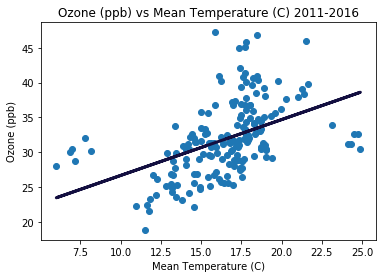

In [439]:
plt.scatter(ozone_temp_pm25_df['Mean Temp (C)'], ozone_temp_pm25_df['Ozone (ppb)'])
plt.xlabel("Mean Temperature (C)")
plt.ylabel("Ozone (ppb)")
plt.title("Ozone (ppb) vs Mean Temperature (C) 2011-2016")
(slope, intercept, r, _, _) = linregress(ozone_temp_pm25_df['Mean Temp (C)'], ozone_temp_pm25_df['Ozone (ppb)'])
fit = slope * ozone_temp_pm25_df['Mean Temp (C)'] + intercept
plt.plot(ozone_temp_pm25_df['Mean Temp (C)'], fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(slope, intercept, r))
plt.savefig('Images/ozonevstemp.png')

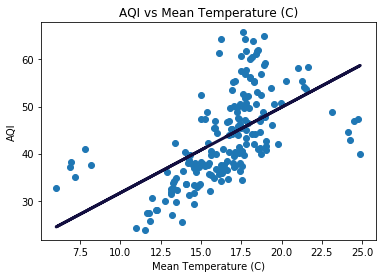

In [440]:
plt.scatter(ozone_temp_pm25_df['Mean Temp (C)'], ozone_temp_pm25_df['AQI'])
plt.xlabel("Mean Temperature (C)")
plt.ylabel("AQI")
plt.title("AQI vs Mean Temperature (C)")
(slope, intercept, r, _, _) = linregress(ozone_temp_pm25_df['Mean Temp (C)'], ozone_temp_pm25_df['AQI'])
fit = slope * ozone_temp_pm25_df['Mean Temp (C)'] + intercept
plt.plot(ozone_temp_pm25_df['Mean Temp (C)'], fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(slope, intercept, r))
plt.savefig('Images/aqivstemp.png')

In [377]:
minmax_df

,Year,County,Mean Temp (C),Max Temp (C),Temp (C) SEM,Ozone (ppb),AQI,PM2.5
6,2011,Inyo,15.875386,42.175926,0.126533,47.201216,46.980609,8.444740
28,2011,Shasta,6.012913,19.814815,0.361575,28.050394,32.612681,5.169643
40,2012,Inyo,17.763418,44.930556,0.127909,45.753145,50.150273,7.558449
62,2012,Shasta,6.844005,21.273148,0.392483,30.033558,37.134576,5.905521
73,2013,Inyo,17.366175,45.092593,0.140442,44.951532,47.356546,7.995986
94,2013,Shasta,7.174482,24.189815,0.379582,28.769613,34.940115,5.541772
101,2014,Inyo,17.744876,42.824074,0.150372,45.030321,47.210959,7.919697
120,2014,Shasta,8.182816,22.199074,0.360026,30.163936,37.550388,5.292638
130,2015,Inyo,17.421616,42.847222,0.131362,42.053497,46.332407,7.051229
149,2015,Shasta,7.784230,21.666667,0.365982,32.076838,40.986321,7.452632


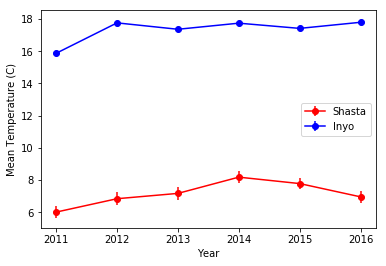

In [390]:
min_df = ozone_temp_pm25_df.loc[(ozone_temp_pm25_df['County']=='Shasta'),:] 
min_df
max_df = ozone_temp_pm25_df.loc[(ozone_temp_pm25_df['County']=='Inyo'),:] 
max_df
plt.errorbar(min_df['Year'], min_df['Mean Temp (C)'], yerr=min_df['Temp (C) SEM'], marker='o', color='red', label="Shasta")
plt.errorbar(max_df['Year'], max_df['Mean Temp (C)'], yerr=max_df['Temp (C) SEM'], marker='o', color='blue', label="Inyo")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (C)")
plt.legend()
plt.savefig('Images/maxmintemp.png')

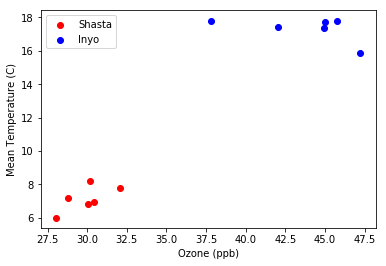

In [392]:
plt.scatter(min_df['Ozone (ppb)'], min_df['Mean Temp (C)'], color='red', label="Shasta")
plt.scatter(max_df['Ozone (ppb)'], max_df['Mean Temp (C)'], color='blue', label="Inyo")
#plt.errorbar(max_df['Year'], max_df['Mean Temp (C)'], yerr=max_df['Temp (C) SEM'], marker='o', color='blue', label="Inyo")
plt.xlabel("Ozone (ppb)")
plt.ylabel("Mean Temperature (C)")
plt.legend()
plt.savefig('Images/maxminO3temp.png')